### Problem Statement




#####  Air pollution is among the most serious environmental problems with adverse effects on public health and the climate. The Air Quality Index (AQI) is a normalized measure of the evaluation of air quality. However, traditional AQI monitoring networks rely on expensive fixed-point sensors covering a limited number of sites. The aim of this project is to develop a machine learning model for AQI prediction based on leading pollutants such as PM2.5, PM10, NO2, SO2, CO, and O3. The goal is to develop a predictive model to predict AQI from real-time pollutant concentrations and implement the model as a web application for better accessibility.


##  AQI Prediction Model using Python
 ###  PM2.5 PM10
 ###  NO, NO2
 ###  NH3 - Ammonia
 ###  CO
 ###  So2
 ###  O3
 ###  Benzene, Toluene, Xylene

In [1]:
pip install numpy pandas matplotlib seaborn scikit-learn streamlit

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip list

Package                        VersionNote: you may need to restart the kernel to use updated packages.

------------------------------ ---------------
absl-py                        2.1.0
altair                         5.5.0
anyio                          4.2.0
argon2-cffi                    23.1.0
argon2-cffi-bindings           21.2.0
arrow                          1.3.0
asttokens                      2.4.1
astunparse                     1.6.3
async-lru                      2.0.4
attrs                          23.2.0
azure-cognitiveservices-speech 1.36.0
Babel                          2.14.0
beautifulsoup4                 4.12.2
bleach                         6.1.0
blinker                        1.8.2
CacheControl                   0.14.0
cachetools                     5.5.0
category-encoders              2.6.4
certifi                        2023.11.17
cffi                           1.16.0
charset-normalizer             3.3.2
click                          8.1.7
cloudpickle          

In [3]:
# importing necessaries libraries 

import numpy as np
import pandas as pd
import streamlit as st
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

In [4]:
# Load Dataset
df = pd.read_csv(r'air quality data.csv')
df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory


In [5]:
#first 5 rows
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [7]:
df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,24933.000000,18391.000000,25949.000000,25946.000000,25346.000000,19203.000000,27472.000000,25677.000000,25509.000000,23908.000000,21490.000000,11422.000000,24850.000000
mean,67.450578,118.127103,17.574730,28.560659,32.309123,23.483476,2.248598,14.531977,34.491430,3.280840,8.700972,3.070128,166.463581
std,64.661449,90.605110,22.785846,24.474746,31.646011,25.684275,6.962884,18.133775,21.694928,15.811136,19.969164,6.323247,140.696585
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,28.820000,56.255000,5.630000,11.750000,12.820000,8.580000,0.510000,5.670000,18.860000,0.120000,0.600000,0.140000,81.000000
50%,48.570000,95.680000,9.890000,21.690000,23.520000,15.850000,0.890000,9.160000,30.840000,1.070000,2.970000,0.980000,118.000000
75%,80.590000,149.745000,19.950000,37.620000,40.127500,30.020000,1.450000,15.220000,45.570000,3.080000,9.150000,3.350000,208.000000
max,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000


In [8]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
29526    False
29527    False
29528    False
29529    False
29530    False
Length: 29531, dtype: bool

In [9]:
# null values
df.isnull()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,False,False,True,True,False,False,False,True,False,False,False,False,False,False,True,True
1,False,False,True,True,False,False,False,True,False,False,False,False,False,False,True,True
2,False,False,True,True,False,False,False,True,False,False,False,False,False,False,True,True
3,False,False,True,True,False,False,False,True,False,False,False,False,False,False,True,True
4,False,False,True,True,False,False,False,True,False,False,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
29527,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
29528,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
29529,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [10]:
#complete null values
df.isnull().sum()

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

In [11]:
# Drop rows where AQI is missing
df.dropna(subset=['AQI'], inplace=True)

In [12]:
# arranging null values in order
df.isnull().sum().sort_values(ascending=False)

Xylene        15372
PM10           7086
NH3            6536
Toluene        5826
Benzene        3535
NOx            1857
O3              807
PM2.5           678
SO2             605
CO              445
NO2             391
NO              387
City              0
Date              0
AQI               0
AQI_Bucket        0
dtype: int64

In [13]:
#shape of dataset
df.shape

(24850, 16)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24850 entries, 28 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        24850 non-null  object 
 1   Date        24850 non-null  object 
 2   PM2.5       24172 non-null  float64
 3   PM10        17764 non-null  float64
 4   NO          24463 non-null  float64
 5   NO2         24459 non-null  float64
 6   NOx         22993 non-null  float64
 7   NH3         18314 non-null  float64
 8   CO          24405 non-null  float64
 9   SO2         24245 non-null  float64
 10  O3          24043 non-null  float64
 11  Benzene     21315 non-null  float64
 12  Toluene     19024 non-null  float64
 13  Xylene      9478 non-null   float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.2+ MB


In [15]:
#stats of the dataset
df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,24172.000000,17764.000000,24463.000000,24459.000000,22993.000000,18314.000000,24405.000000,24245.000000,24043.000000,21315.000000,19024.000000,9478.000000,24850.000000
mean,67.476613,118.454435,17.622421,28.978391,32.289012,23.848366,2.345267,14.362933,34.912885,3.458668,9.525714,3.588683,166.463581
std,63.075398,89.487976,22.421138,24.627054,30.712855,25.875981,7.075208,17.428693,21.724525,16.036020,20.881085,6.754324,140.696585
min,0.040000,0.030000,0.030000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,29.000000,56.777500,5.660000,11.940000,13.110000,8.960000,0.590000,5.730000,19.250000,0.230000,1.027500,0.390000,81.000000
50%,48.785000,96.180000,9.910000,22.100000,23.680000,16.310000,0.930000,9.220000,31.250000,1.290000,3.575000,1.420000,118.000000
75%,80.925000,150.182500,20.030000,38.240000,40.170000,30.360000,1.480000,15.140000,46.080000,3.340000,10.180000,4.120000,208.000000
max,914.940000,917.080000,390.680000,362.210000,378.240000,352.890000,175.810000,186.080000,257.730000,455.030000,454.850000,170.370000,2049.000000


In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PM2.5,24172.0,67.476613,63.075398,0.04,29.0000,48.785,80.9250,914.94
PM10,17764.0,118.454435,89.487976,0.03,56.7775,96.180,150.1825,917.08
NO,24463.0,17.622421,22.421138,0.03,5.6600,9.910,20.0300,390.68
NO2,24459.0,28.978391,24.627054,0.01,11.9400,22.100,38.2400,362.21
NOx,22993.0,32.289012,30.712855,0.00,13.1100,23.680,40.1700,378.24
NH3,18314.0,23.848366,25.875981,0.01,8.9600,16.310,30.3600,352.89
CO,24405.0,2.345267,7.075208,0.00,0.5900,0.930,1.4800,175.81
SO2,24245.0,14.362933,17.428693,0.01,5.7300,9.220,15.1400,186.08
O3,24043.0,34.912885,21.724525,0.01,19.2500,31.250,46.0800,257.73
Benzene,21315.0,3.458668,16.036020,0.00,0.2300,1.290,3.3400,455.03


In [17]:
#percentage ofnull values in dataset
null_values_percentages=(df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)
null_values_percentages

Xylene        61.859155
PM10          28.515091
NH3           26.301811
Toluene       23.444668
Benzene       14.225352
NOx            7.472837
O3             3.247485
PM2.5          2.728370
SO2            2.434608
CO             1.790744
NO2            1.573441
NO             1.557344
City           0.000000
Date           0.000000
AQI            0.000000
AQI_Bucket     0.000000
dtype: float64

 ## key considerations 
   ### Xylene has the highest percentage of missing values - 61.86%
   ### PM10 and NH3 28 - 26 %

In [18]:
#Univariate analysis
df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
28,Ahmedabad,2015-01-29,83.13,NaN,6.93,28.71,33.72,NaN,6.93,49.52,59.76,0.02,0.00,3.14,209.0,Poor
29,Ahmedabad,2015-01-30,79.84,NaN,13.85,28.68,41.08,NaN,13.85,48.49,97.07,0.04,0.00,4.81,328.0,Very Poor
30,Ahmedabad,2015-01-31,94.52,NaN,24.39,32.66,52.61,NaN,24.39,67.39,111.33,0.24,0.01,7.67,514.0,Severe
31,Ahmedabad,2015-02-01,135.99,NaN,43.48,42.08,84.57,NaN,43.48,75.23,102.70,0.40,0.04,25.87,782.0,Severe
32,Ahmedabad,2015-02-02,178.33,NaN,54.56,35.31,72.80,NaN,54.56,55.04,107.38,0.46,0.06,35.61,914.0,Severe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory


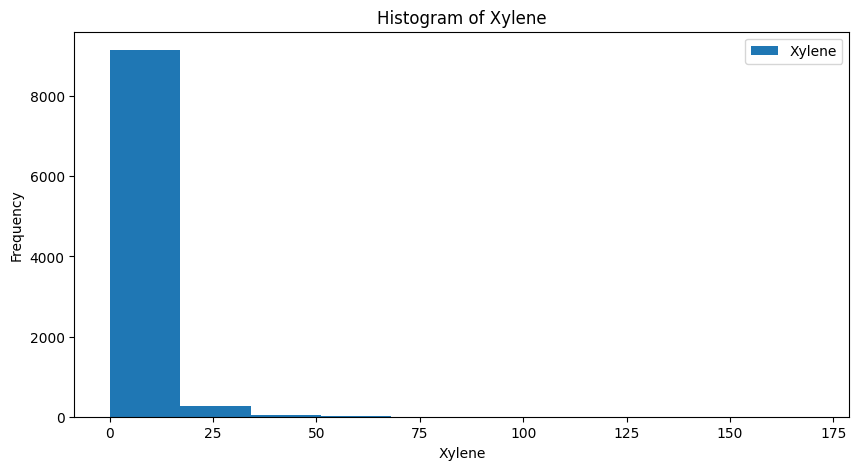

In [20]:
df['Xylene'].plot(kind='hist',figsize=(10,5))
plt.xlabel('Xylene')
plt.ylabel('Frequency')
plt.title('Histogram of Xylene')
plt.legend()
plt.show()

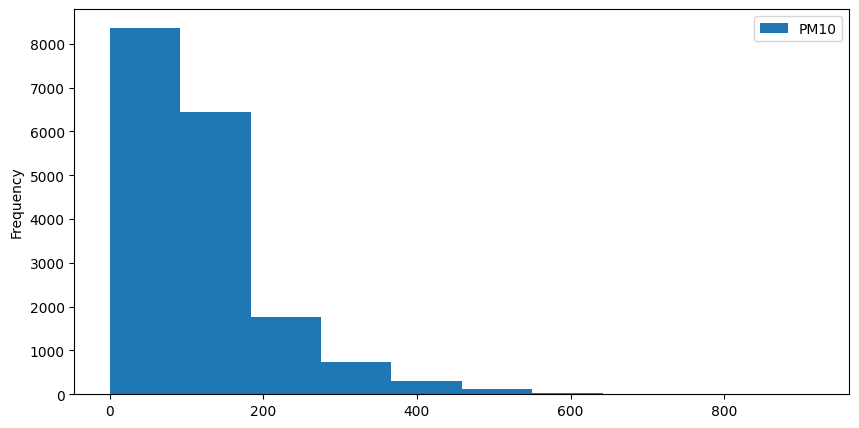

In [21]:
df['PM10'].plot(kind='hist',figsize=(10,5))      
plt.legend()
plt.show()

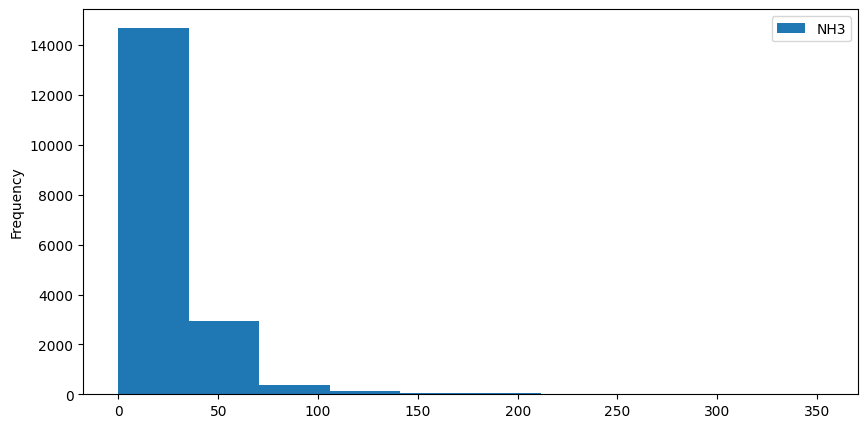

In [22]:
df['NH3'].plot(kind='hist',figsize=(10,5))       
plt.legend()
plt.show();

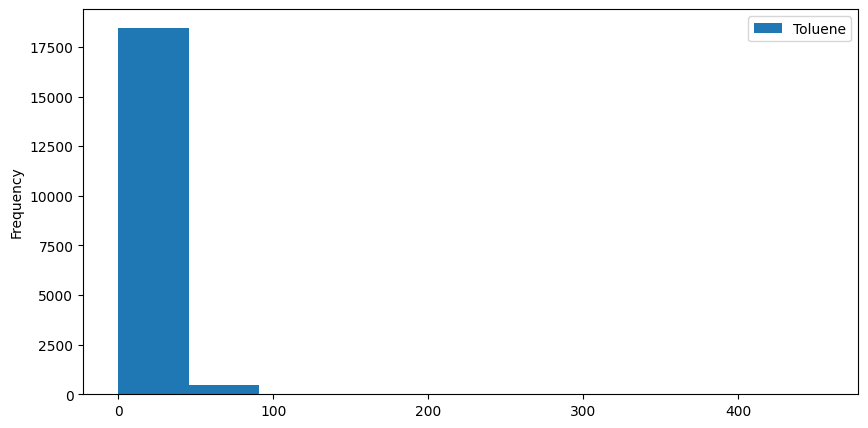

In [23]:
df['Toluene'].plot(kind='hist',figsize=(10,5))       
plt.legend()
plt.show();

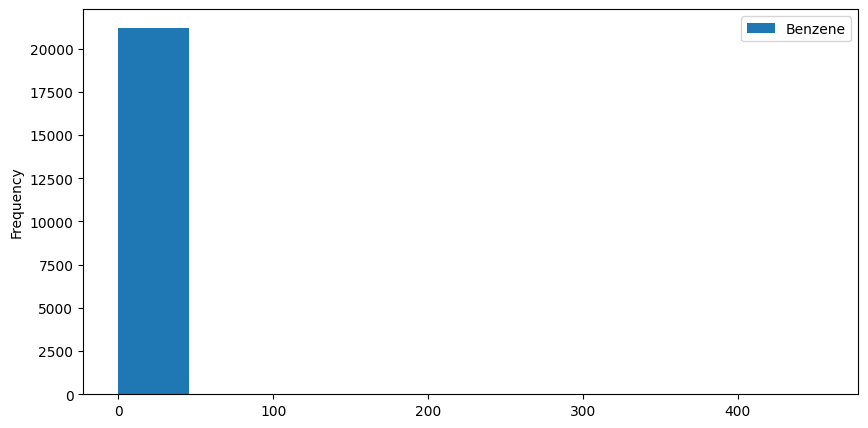

In [24]:
df['Benzene'].plot(kind='hist',figsize=(10,5))       
plt.legend()
plt.show();

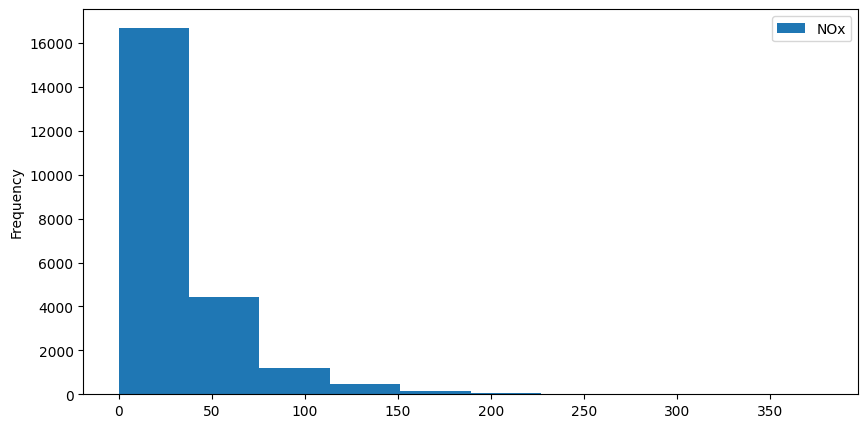

In [25]:
df['NOx'].plot(kind='hist',figsize=(10,5))       
plt.legend()
plt.show();

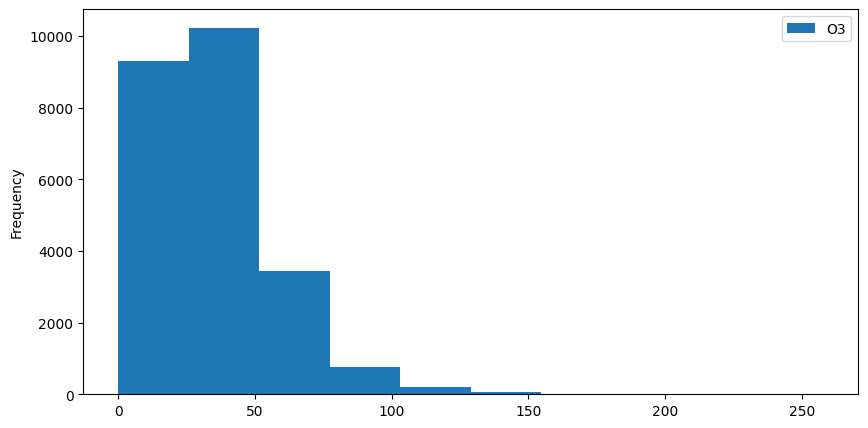

In [26]:
df['O3'].plot(kind='hist',figsize=(10,5))       
plt.legend()
plt.show();

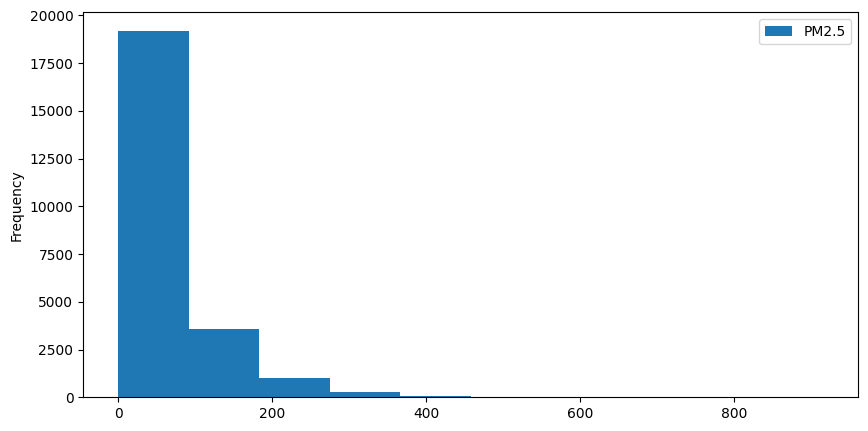

In [27]:
df['PM2.5'].plot(kind='hist',figsize=(10,5))       
plt.legend()
plt.show();

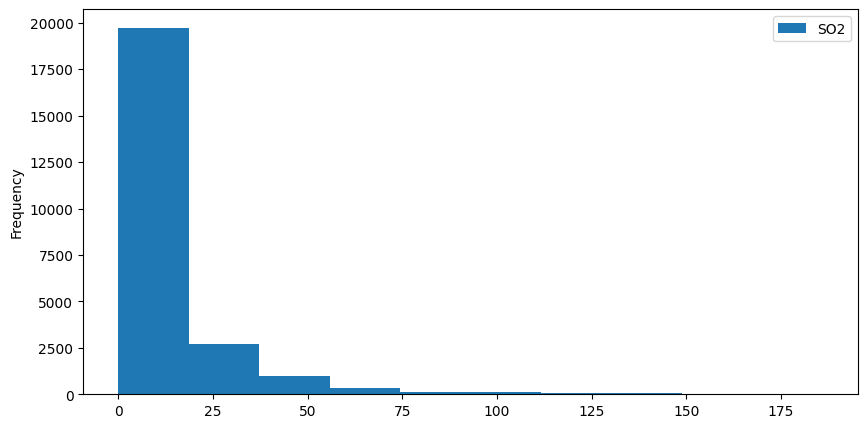

In [28]:
df['SO2'].plot(kind='hist',figsize=(10,5))       
plt.legend()
plt.show();

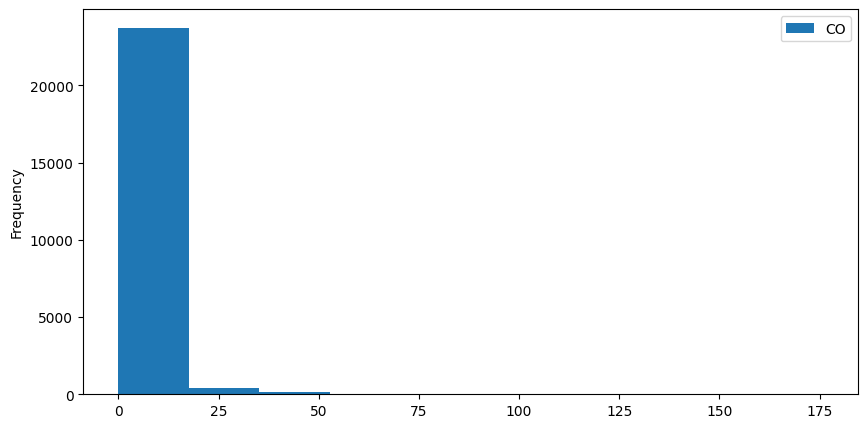

In [29]:
df['CO'].plot(kind='hist',figsize=(10,5))       
plt.legend()
plt.show();

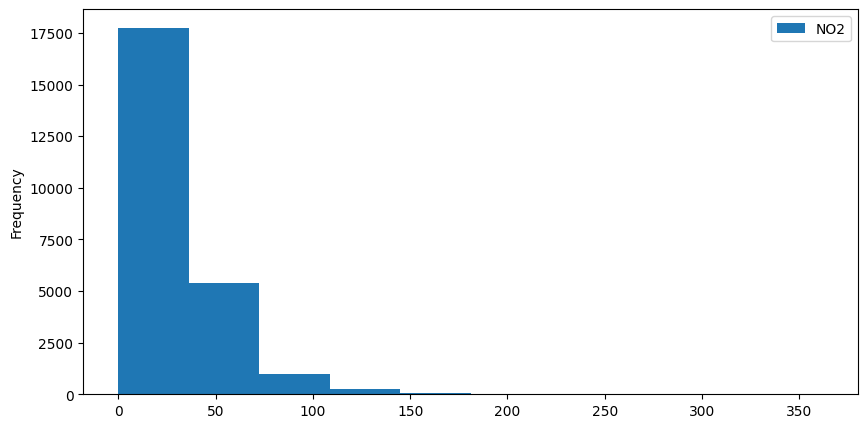

In [30]:
df['NO2'].plot(kind='hist',figsize=(10,5))       
plt.legend()
plt.show();


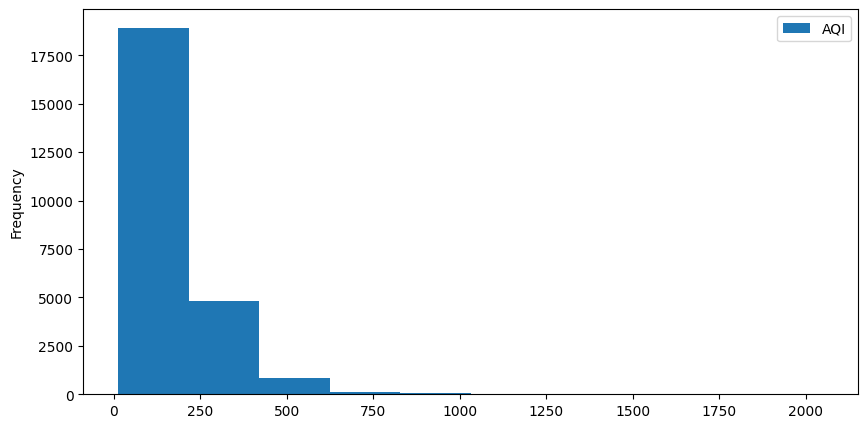

In [33]:
df['AQI'].plot(kind='hist',figsize=(10,5))       
plt.legend()
plt.show();

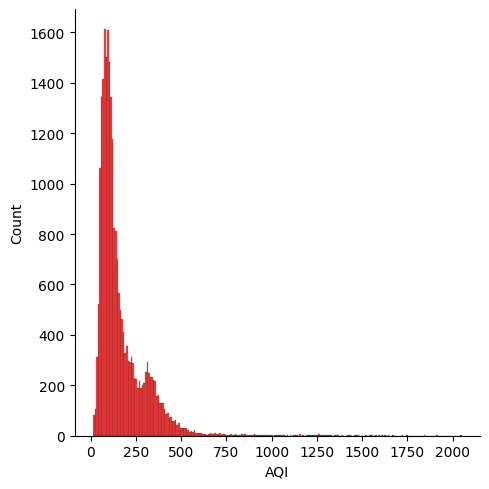

In [35]:
# Distribution of AQi from 2015 to 2020
sns.displot(df, x='AQI', color='red')
plt.show()

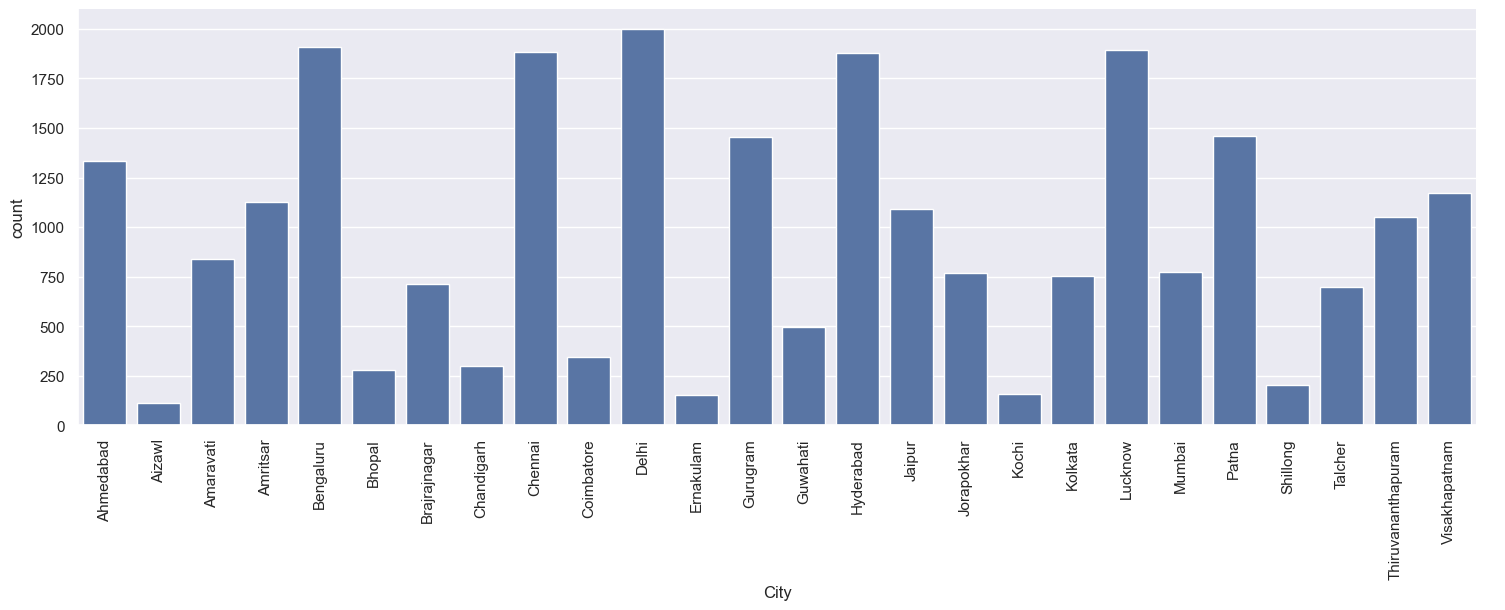

In [37]:
# Bivariate
sns.set_theme(style="darkgrid",color_codes='b')
graph = sns.catplot(x="City", kind='count', data=df, height=5, aspect=3)
graph.set_xticklabels(rotation=90)

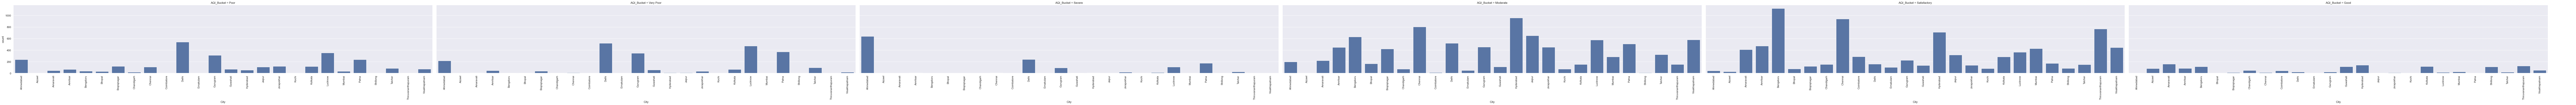

In [41]:
sns.set_theme(style="darkgrid")
graph=sns.catplot(x="City",kind='count',data=df,col="AQI_Bucket",height=5,aspect=5)
graph.set_xticklabels(rotation=90)

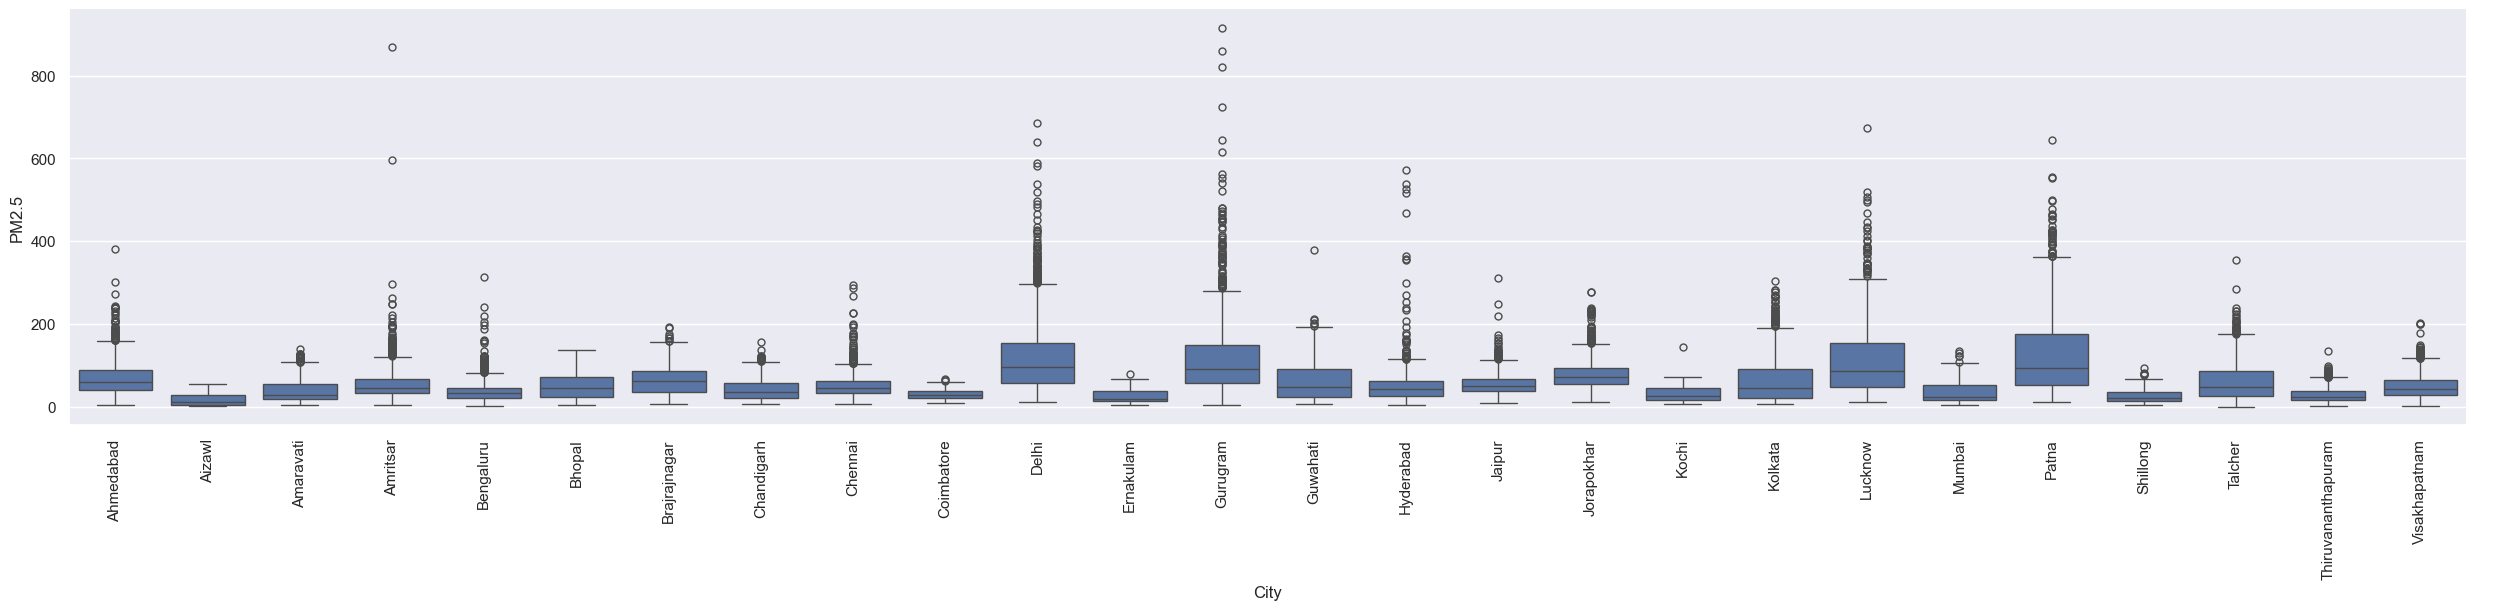

In [42]:
graph1=sns.catplot(x='City',y='PM2.5',kind='box',data=df,height=5,aspect=5)
graph1.set_xticklabels(rotation=90)

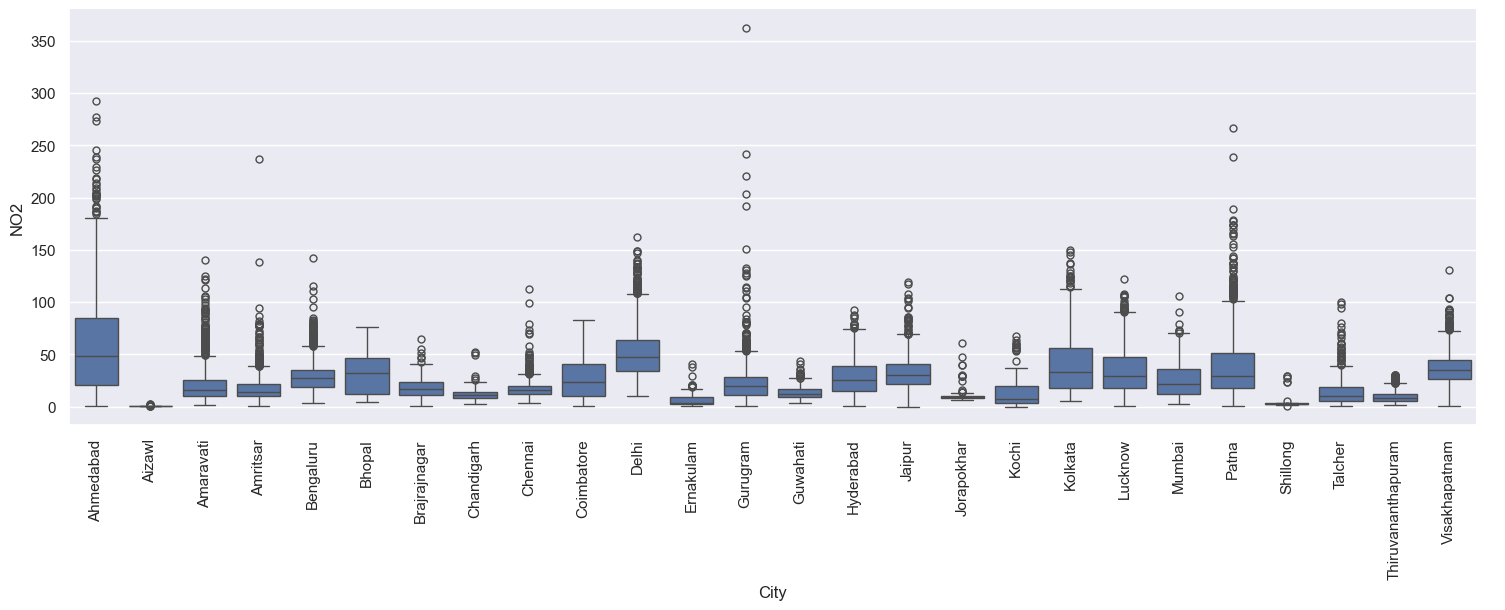

In [58]:
graph2 = sns.catplot(x='City', y='NO2', kind='box', data=df, height=5, aspect=3)
graph2.set_xticklabels(rotation=90)

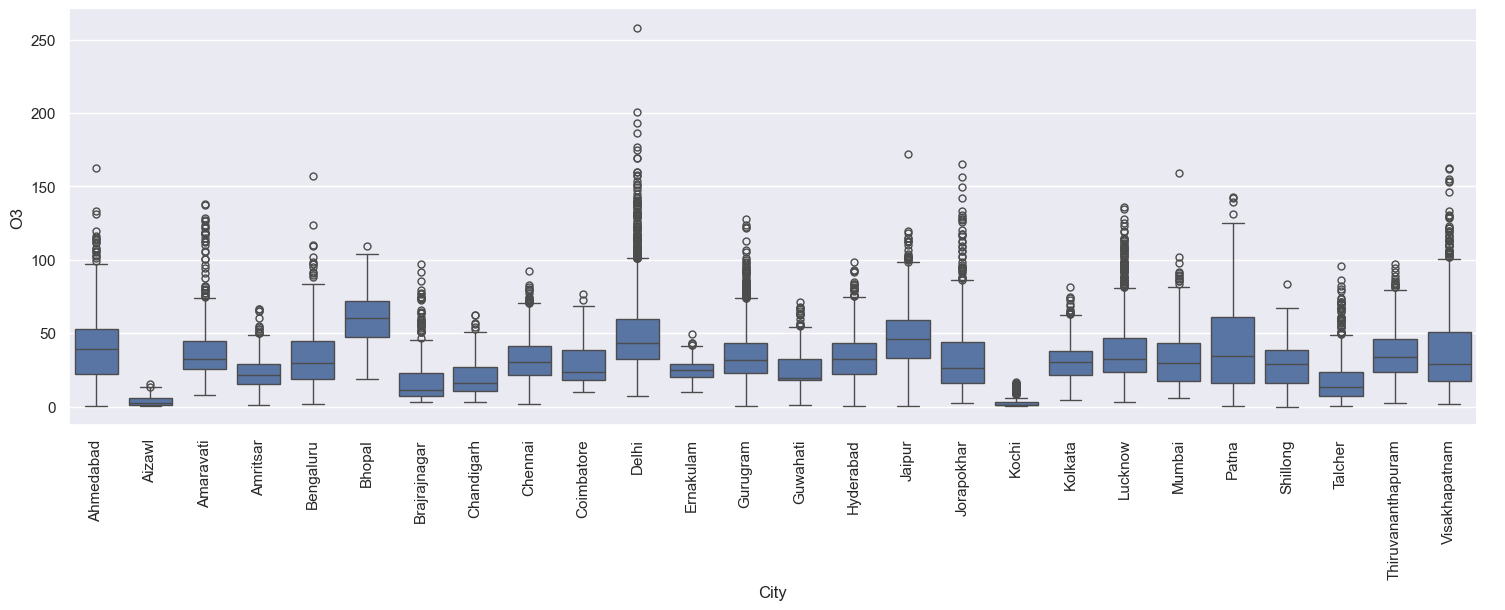

In [59]:
graph3 = sns.catplot(x='City', y='O3', kind='box', data=df, height=5, aspect=3)
graph3.set_xticklabels(rotation=90)

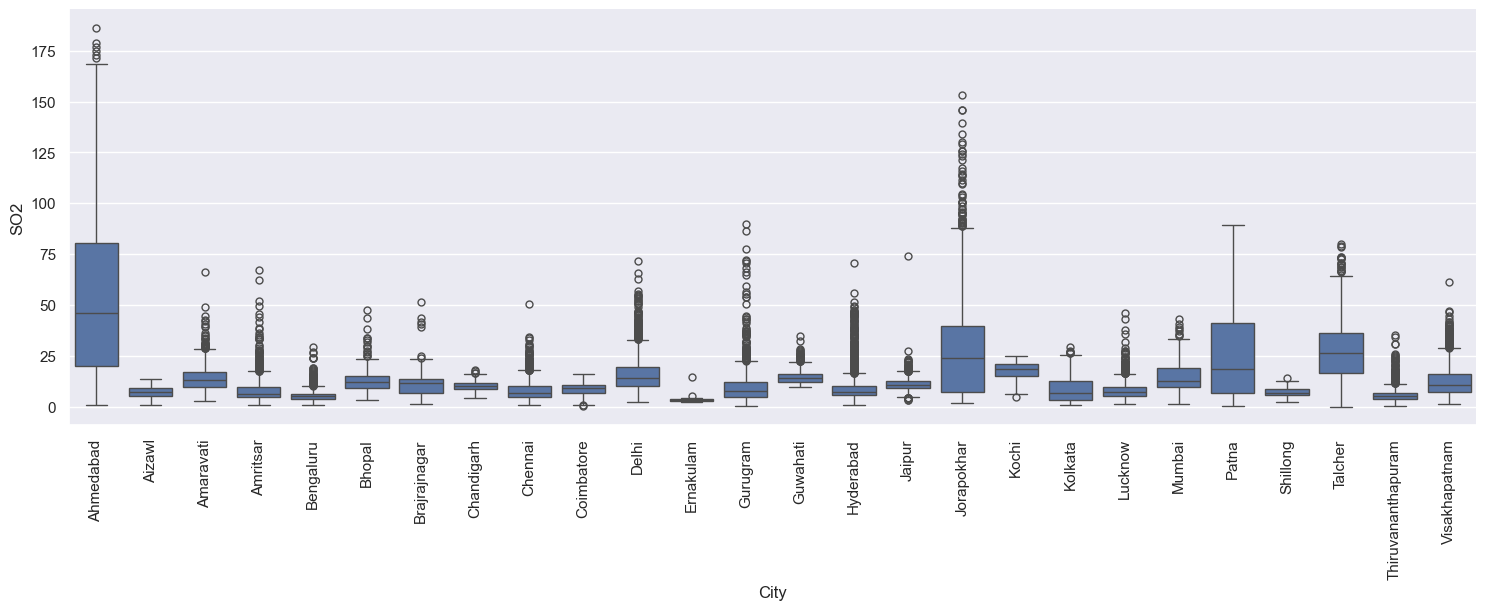

In [60]:
graph4 = sns.catplot(x='City', y='SO2', kind='box', data=df, height=5, aspect=3)
graph4.set_xticklabels(rotation=90)

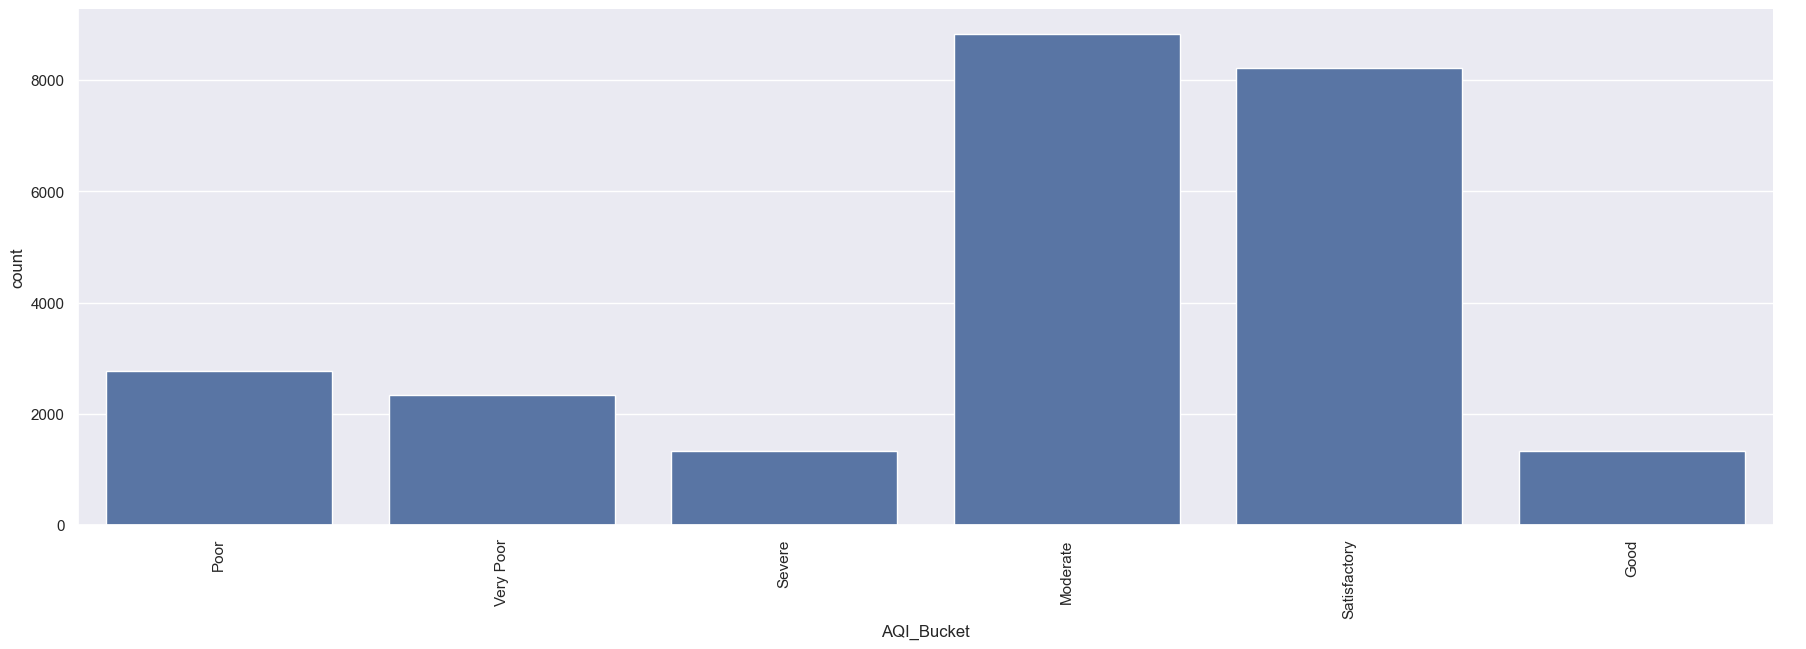

In [61]:
graph5 = sns.catplot(x='AQI_Bucket', data=df, kind='count', height=6, aspect=3)
graph5.set_xticklabels(rotation=90)

In [62]:
# check the null values
df.isnull().sum().sort_values(ascending=False)


City          0
Date          0
PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
Xylene        0
AQI           0
AQI_Bucket    0
dtype: int64

In [63]:
df.describe().loc['mean']

PM2.5       67.873120
PM10       117.242424
NO          17.566347
NO2         28.837747
NOx         30.737739
NH3         24.177722
CO           2.333432
SO2         14.295046
O3          34.713809
Benzene      3.169080
Toluene      7.752518
Xylene       2.648011
AQI        166.463581
Name: mean, dtype: float64

In [64]:
fill_values = {
    "PM2.5": 67.476613,
    "PM10": 118.454435,
    "NO": 17.622421,
    "NO2": 28.978391,
    "NOx": 32.289012,
    "NH3": 23.848366,
    "CO": 2.345267,
    "SO2": 34.912885,
    "O3": 38.320547,
    "Benzene": 3.458668,
    "Toluene": 9.525714,
    "Xylene": 3.588683
}

df = df.fillna(fill_values)

df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
28,Ahmedabad,2015-01-29,83.13,130.264,6.93,28.71,33.72,38.506,6.93,49.52,59.76,0.02,0.00,3.14,209.0,Poor
29,Ahmedabad,2015-01-30,79.84,145.474,13.85,28.68,41.08,14.454,13.85,48.49,97.07,0.04,0.00,4.81,328.0,Very Poor
30,Ahmedabad,2015-01-31,94.52,159.214,24.39,32.66,52.61,12.546,24.39,67.39,111.33,0.24,0.01,7.67,514.0,Severe
31,Ahmedabad,2015-02-01,135.99,246.962,43.48,42.08,84.57,22.862,43.48,75.23,102.70,0.40,0.04,25.87,782.0,Severe
32,Ahmedabad,2015-02-02,178.33,316.434,54.56,35.31,72.80,49.102,54.56,55.04,107.38,0.46,0.06,35.61,914.0,Severe


In [65]:
df = df.drop(['AQI_Bucket'], axis=1)
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
28,Ahmedabad,2015-01-29,83.13,130.264,6.93,28.71,33.72,38.506,6.93,49.52,59.76,0.02,0.00,3.14,209.0
29,Ahmedabad,2015-01-30,79.84,145.474,13.85,28.68,41.08,14.454,13.85,48.49,97.07,0.04,0.00,4.81,328.0
30,Ahmedabad,2015-01-31,94.52,159.214,24.39,32.66,52.61,12.546,24.39,67.39,111.33,0.24,0.01,7.67,514.0
31,Ahmedabad,2015-02-01,135.99,246.962,43.48,42.08,84.57,22.862,43.48,75.23,102.70,0.40,0.04,25.87,782.0
32,Ahmedabad,2015-02-02,178.33,316.434,54.56,35.31,72.80,49.102,54.56,55.04,107.38,0.46,0.06,35.61,914.0


<Axes: >

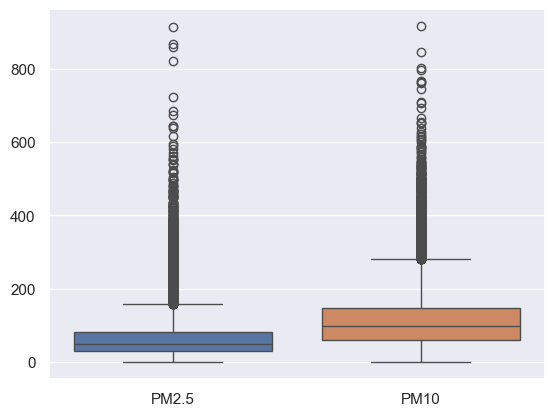

In [66]:
sns.boxplot(data=df[['PM2.5', 'PM10']])

<Axes: >

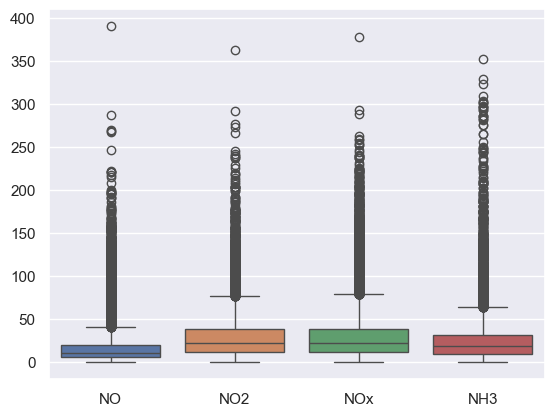

In [67]:
sns.boxplot(data=df[['NO', 'NO2', 'NOx', 'NH3']])

<Axes: >

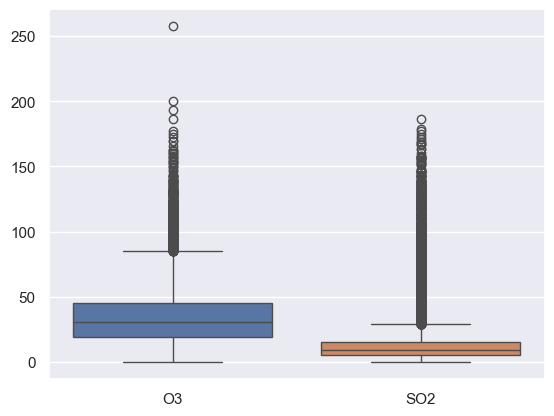

In [68]:
sns.boxplot(data=df[['O3', 'SO2']])

In [69]:
# IQR Method - Q3 Q1
#q3(third percentile)->(0.25)
#q1(first percentile)->(0.75)
#IQR=q3-q1
def replace_outliers(df):
    for column in df.select_dtypes(include=['number']).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lb = Q1 - 1.5 * IQR
        ub = Q3 + 1.5 * IQR
        df[column] = df[column].apply(
            lambda x: Q1 if x < lb else (Q3 if x > ub else x)
        )
    return df
    

In [70]:
df = replace_outliers(df)
df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
28,Ahmedabad,2015-01-29,83.130,130.264,6.93,28.71,33.72,38.506,1.49,15.07,59.76,0.020,0.000,3.14,209.0
29,Ahmedabad,2015-01-30,79.840,145.474,13.85,28.68,41.08,14.454,1.49,15.07,45.61,0.040,0.000,4.81,328.0
30,Ahmedabad,2015-01-31,94.520,159.214,24.39,32.66,52.61,12.546,1.49,15.07,45.61,0.240,0.010,3.03,208.0
31,Ahmedabad,2015-02-01,135.990,246.962,19.87,42.08,38.43,22.862,1.49,15.07,45.61,0.400,0.040,3.03,208.0
32,Ahmedabad,2015-02-02,81.495,148.715,19.87,35.31,72.80,49.102,1.49,15.07,45.61,0.460,0.060,3.03,208.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.020,50.940,7.68,25.06,19.54,12.470,0.47,8.55,23.30,2.240,12.070,0.73,41.0
29527,Visakhapatnam,2020-06-28,24.380,74.090,3.42,26.06,16.53,11.990,0.52,12.72,30.14,0.740,2.210,0.38,70.0
29528,Visakhapatnam,2020-06-29,22.910,65.730,3.45,29.53,18.33,10.710,0.48,8.42,30.96,0.010,0.010,0.00,68.0
29529,Visakhapatnam,2020-06-30,16.640,49.970,4.05,29.26,18.80,10.030,0.52,9.84,28.30,0.000,0.000,0.00,54.0


In [71]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PM2.5,24850.0,55.910949,33.056334,0.04,29.5200,49.750,81.49125,159.450
PM10,24850.0,106.169471,57.585443,0.03,60.4405,98.670,148.71125,281.060
NO,24850.0,12.471948,8.847990,0.03,5.6800,9.945,19.87000,41.150
NO2,24850.0,25.804327,16.811215,0.01,11.9600,22.010,37.98000,77.000
NOx,24850.0,25.337891,17.398486,0.00,11.6385,22.190,38.43000,78.610
NH3,24850.0,21.147464,14.116368,0.01,9.5800,18.043,31.40225,64.130
CO,24850.0,1.012246,0.584404,0.00,0.5900,0.940,1.49000,2.840
SO2,24850.0,10.273290,5.801487,0.01,5.7000,9.200,15.07000,29.120
O3,24850.0,33.035350,17.721252,0.01,19.3600,30.985,45.61000,84.980
Benzene,24850.0,1.652325,1.725588,0.00,0.1700,1.070,3.01000,7.270


<Axes: >

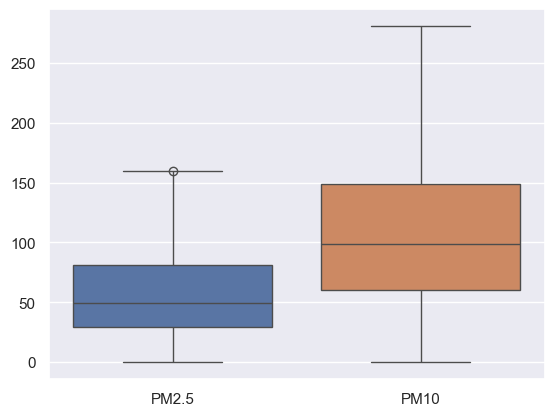

In [72]:
sns.boxplot(data=df[['PM2.5', 'PM10']])

<Axes: >

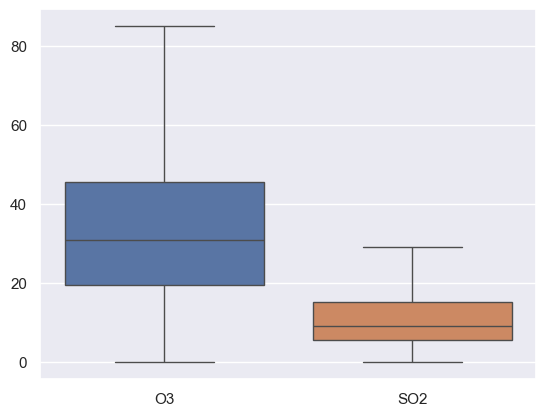

In [73]:
sns.boxplot(data=df[['O3', 'SO2']])

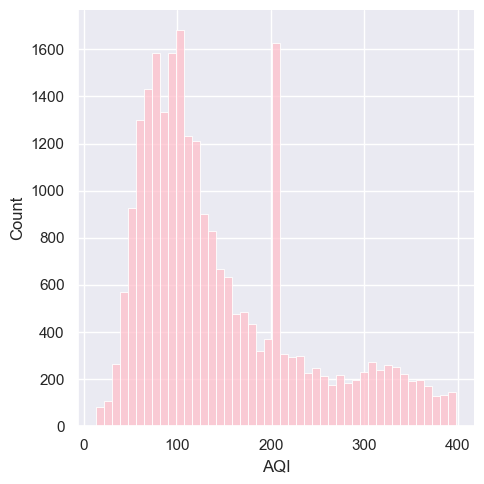

In [74]:
sns.displot(df, x='AQI', color='pink')
plt.show()

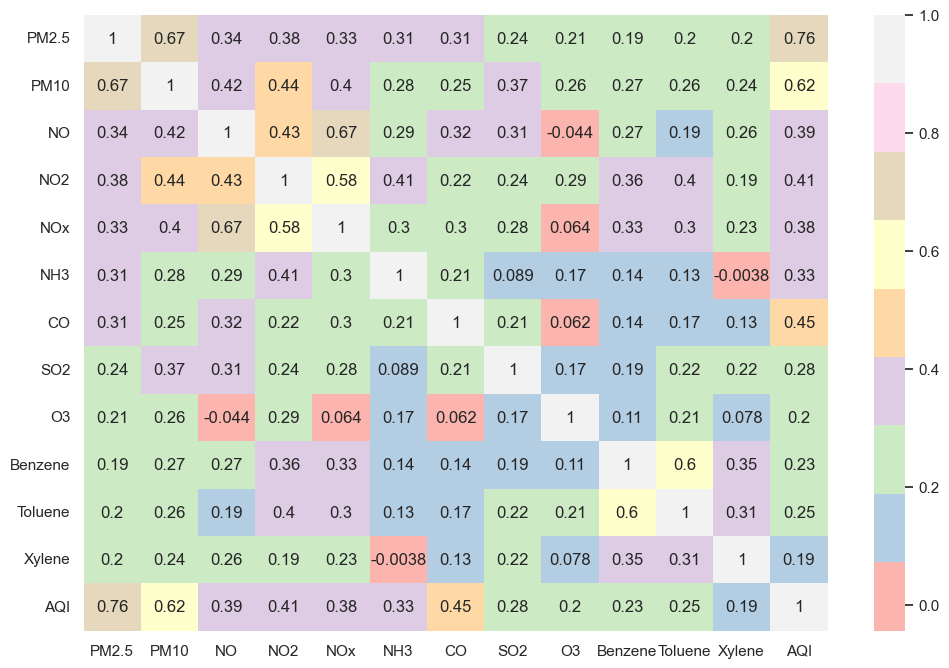

In [75]:
# Multivariate Analysis - Heatmap
#exclude non-numeric columns
df_numeric = df.select_dtypes(include=['number'])
# correlation matrix for numeric columns only
corr_matrix = df_numeric.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='Pastel1')
plt.show()


In [76]:
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# KNN Imputation for missing values
imputer = KNNImputer(n_neighbors=5)
df.iloc[:, 2:-2] = imputer.fit_transform(df.iloc[:, 2:-2])

In [77]:
# Splitting Data
X = df[['PM2.5', 'PM10', 'NO', 'NO2', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene']]
y = df['AQI']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [78]:
# Train Model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [79]:
y_pred = model.predict(X_test)

In [80]:
 mean_absolute_error(y_test, y_pred)

23.074808960344956

In [81]:
mean_squared_error(y_test, y_pred, squared=False)

36.39078376268732

In [82]:
r2_score(y_test, y_pred)

0.8241663983505046

In [84]:
# Predictions
y_pred1 = model.predict(X_test)

In [52]:
# Evaluate done in streamlit
st.write("MAE:", mean_absolute_error(y_test, y_pred))
st.write("RMSE:", mean_squared_error(y_test, y_pred, squared=False))
st.write("R² Score:", r2_score(y_test, y_pred))


2025-03-03 22:18:36.450 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-03 22:18:36.867 
  command:

    streamlit run C:\Users\SATHVIK\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-03-03 22:18:36.868 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-03 22:18:36.870 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-03 22:18:36.870 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-03 22:18:36.873 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-03 22:18:36.873 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-03 22:18:36.876 Thread 'MainThread': missing Sc

In [ ]:

# Streamlit UI
st.title("AQI Prediction App")
st.write("Upload an air quality dataset to predict AQI")
uploaded_file = st.file_uploader("Upload CSV", type=["csv"])

if uploaded_file is not None:
    new_data = pd.read_csv(uploaded_file)
    predictions = model.predict(new_data)
    st.write(predictions)

In [ ]:
import streamlit as st
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

st.title("AQI Prediction Model")

uploaded_file = st.file_uploader("Upload Air Quality Dataset", type=["csv"])

if uploaded_file is not None:
    df = pd.read_csv(uploaded_file)
    st.write("Dataset Preview:", df.head())

    # Define features and target variable
    X = df[['PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'O3']]
    y = df['AQI']

    # Train Model
    model = LinearRegression()
    model.fit(X, y)

    # User Input
    st.subheader("Enter Pollutant Values:")
    pm25 = st.number_input("PM2.5", value=50.0)
    pm10 = st.number_input("PM10", value=80.0)
    no2 = st.number_input("NO2", value=20.0)
    so2 = st.number_input("SO2", value=10.0)
    co = st.number_input("CO", value=1.0)
    o3 = st.number_input("O3", value=30.0)

    # Make Prediction
    input_data = np.array([[pm25, pm10, no2, so2, co, o3]])
    predicted_aqi = model.predict(input_data)[0]

    st.subheader(f"Predicted AQI: {predicted_aqi:.2f}")
